## Initial data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# pull data from github
bank_data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/Introduction-to-Data-Analysis/master/chapter03/data/bank-additional/bank-additional-full.csv", sep=";")

# visualize the head of the dataset
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


## Exercise 3.01: Analyzing distributions of numerical features in banking dataset

In [2]:
# define numerical features
numerical_features = [col for col in bank_data.columns \
                      if np.issubdtype(bank_data[col].dtype, np.number)]
print(numerical_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [3]:
# print statistics about the different numerical columns
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


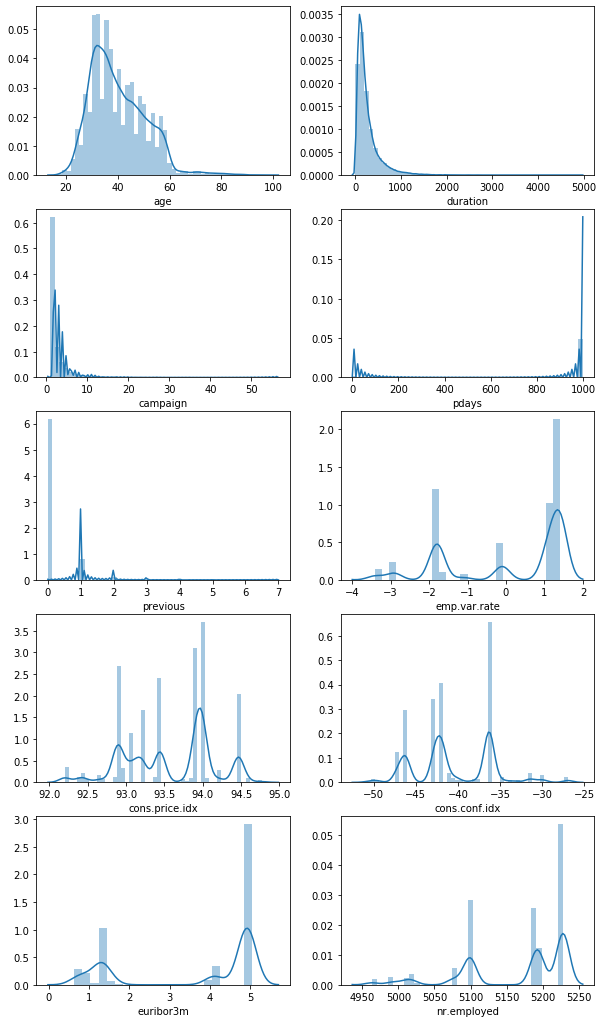

In [4]:
# plot distributions of numerical features
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.distplot(bank_data[col])
plt.savefig("figs/exercise_3_01_distributions.png", format="png")

## Exercise 3.02: Analyzing distributions of categorical features in banking dataset

In [5]:
# define categorical features
categorical_features = [col for col in bank_data.columns \
                      if pd.api.types.is_string_dtype(bank_data[col])]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


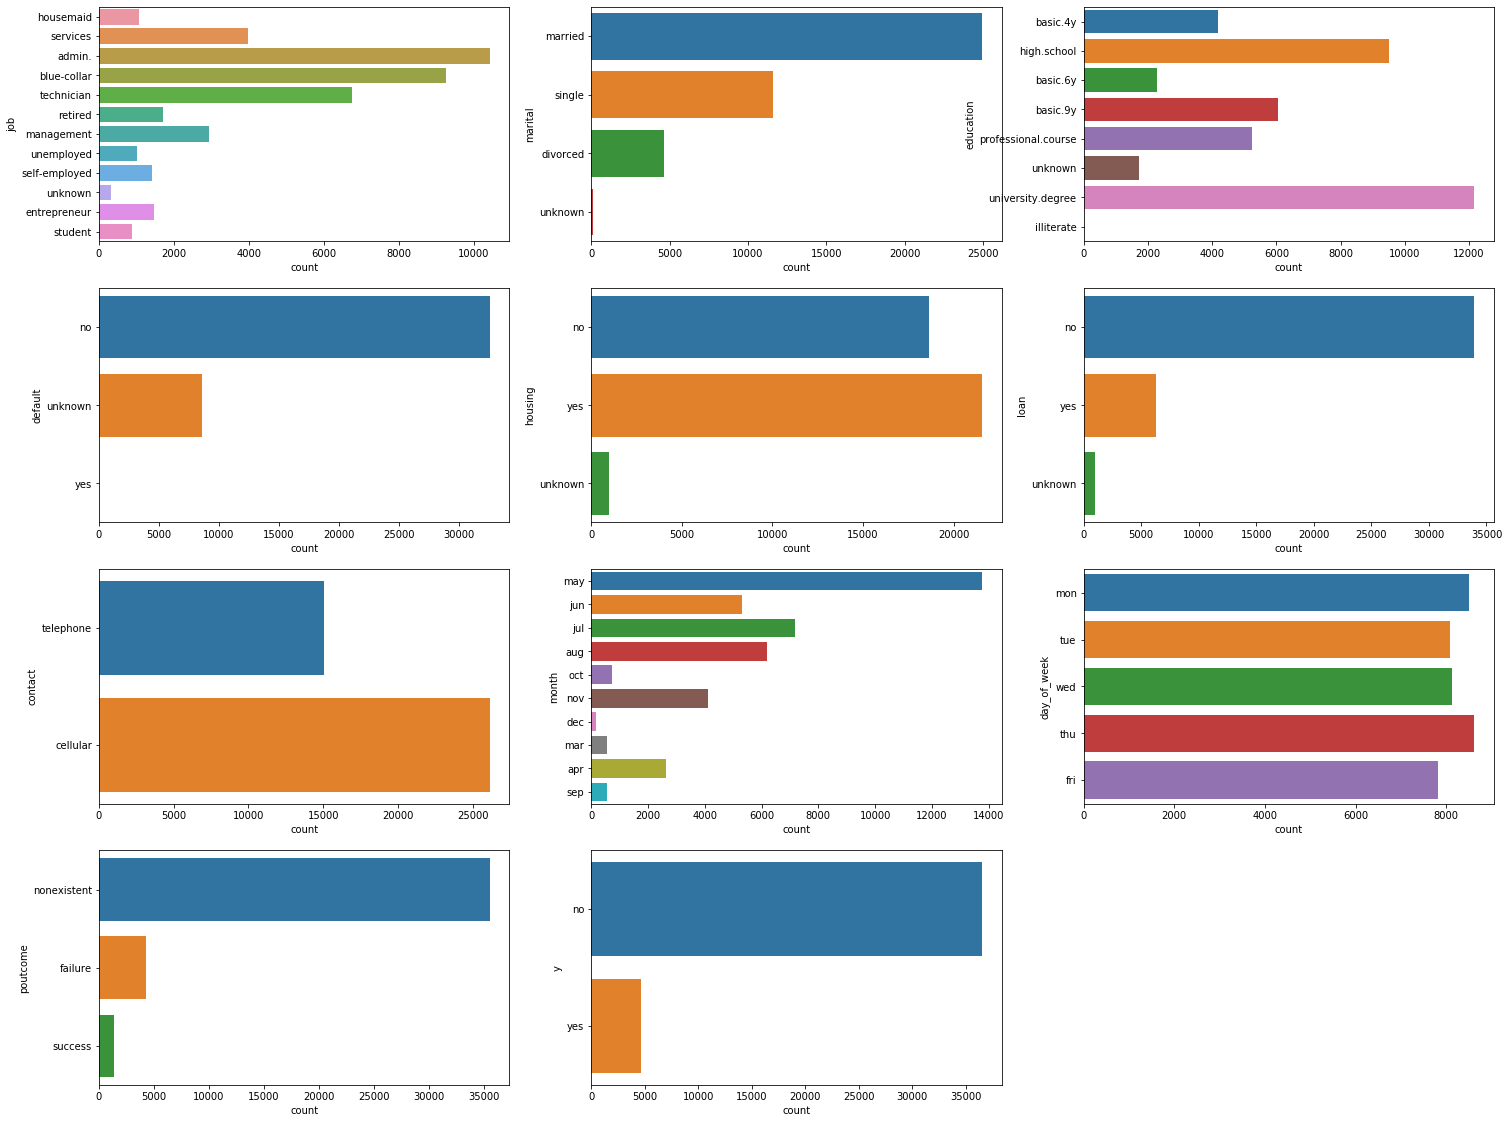

In [6]:
# plot distributions of numerical features
plt.figure(figsize=(25,25))
for index, col in enumerate(categorical_features):
    plt.subplot(5, 3, index+1)
    sns.countplot(y=col, data=bank_data)

plt.savefig("figs/exercise_3_02_counts.png", format="png")

In [7]:
# compute number of entries in y column
print("Total number of entries:")
print(bank_data["y"].value_counts(ascending=True))
print()
print("Percentages:")
print(bank_data["y"].value_counts(normalize=True, ascending=True)*100)

Total number of entries:
yes     4640
no     36548
Name: y, dtype: int64

Percentages:
yes    11.265417
no     88.734583
Name: y, dtype: float64


## Impact of numerical features on outcome

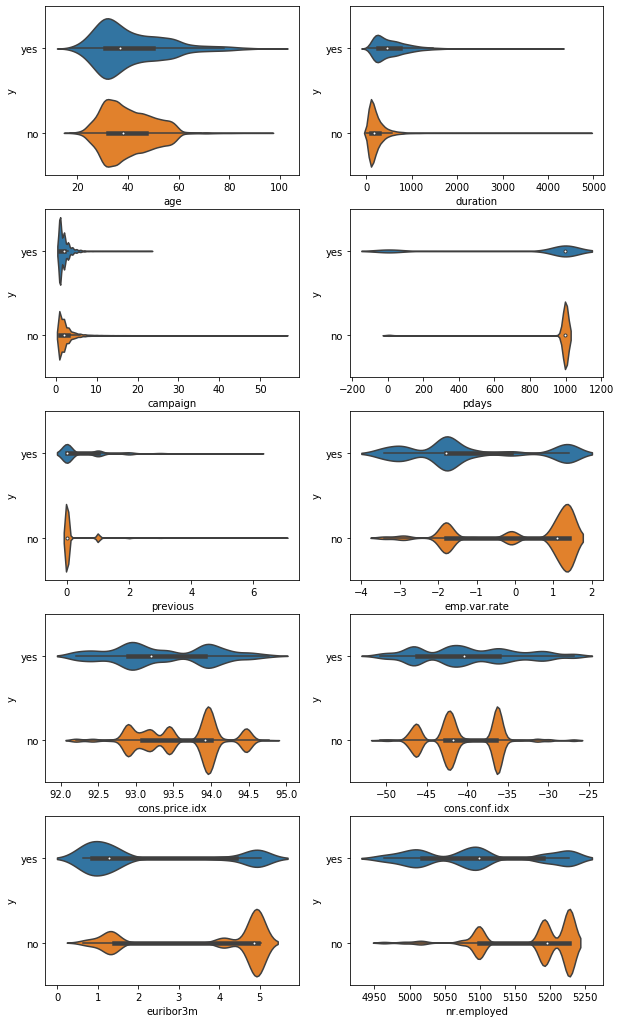

In [26]:
# create violin plots for successful and non-successful marketing campaigns
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.violinplot(x=col, y="y", data=bank_data, order=["yes", "no"])
plt.savefig("figs/violin_plots_numerical_features.png", format="png")

In [9]:
from scipy.stats import ttest_ind

# define function for computing mean of column for yes and no cases,
# as well as the test statistics and pvalue for equality of means test
def test_means(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()

    ttest_res = ttest_ind(values_yes, values_no)
    
    return [col, mean_yes, mean_no, \
            round(ttest_res[0], 4), round(ttest_res[1],4)]

    
# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "mean yes", \
    "mean no", "ttest stat", "ttest pval"])

# for each column in the numerical_features, compute means 
# and test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank_data, col)
    
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


## Exercise 3.03: Hypothesis test of difference of distributions in numerical features

In [10]:
from scipy.stats import ks_2samp

# define function which performs Kolmogorov-Smirnov test, 
# for provided column
def test_ks(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]

    kstest_res = ks_2samp(values_yes, values_no)
    
    return [col, round(kstest_res[0], 4), round(kstest_res[1],4)]

# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "ks stat", "ks pval"])

# for each column in the numerical_features, 
# compute test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(bank_data, col)
    
test_df

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


<Figure size 720x720 with 0 Axes>

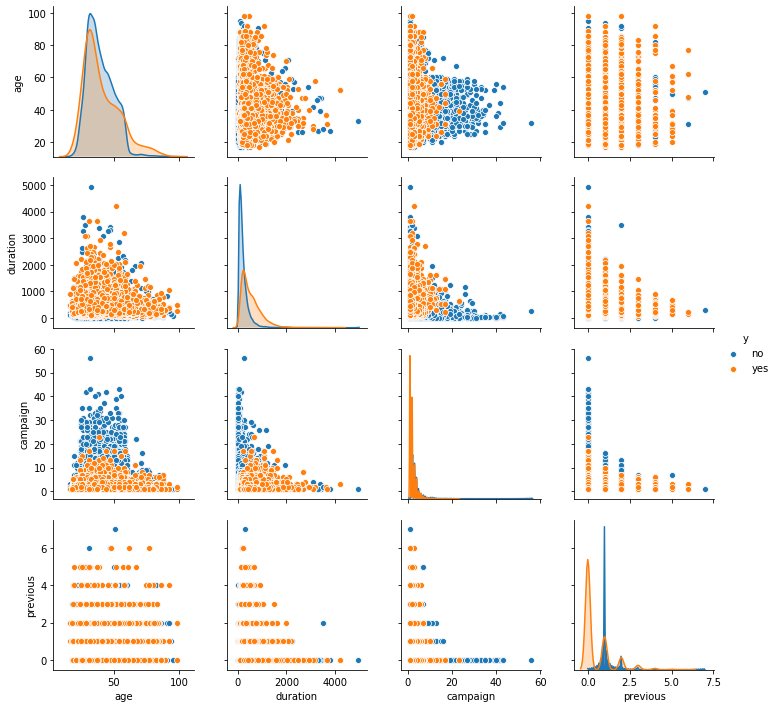

<Figure size 720x720 with 0 Axes>

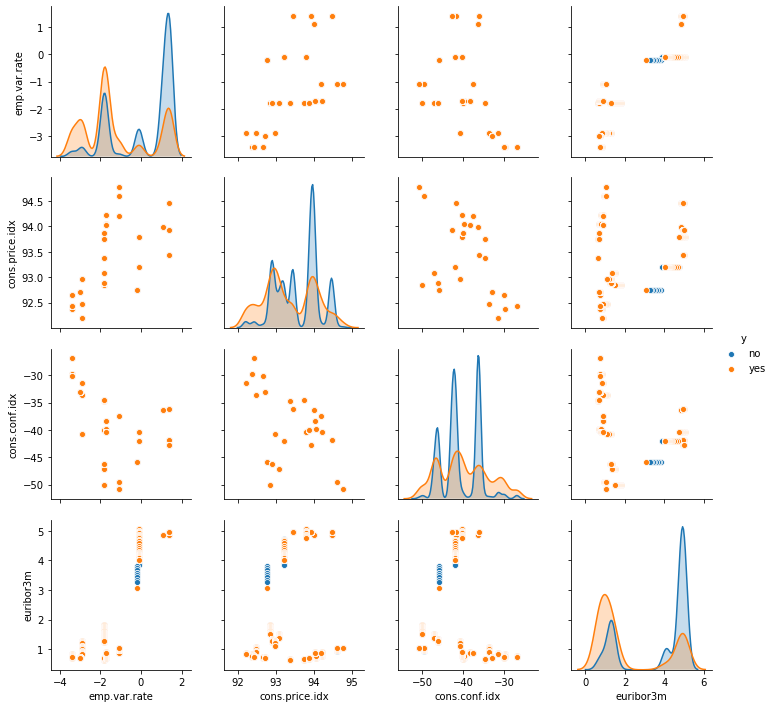

In [28]:
# create arrays containing cambaing and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", \
                     "cons.conf.idx", "euribor3m"]

# create pairplot between campaign columns
plot_data = bank_data[campaign_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y")
plt.savefig("figs/pairplot_campaign.png", format="png", dpi=300)

# create pairplot between financial features
plot_data = bank_data[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y")
plt.savefig("figs/pairplot_financial.png", format="png", dpi=300)

In [47]:
# create mask for successful calls
successful_calls = bank_data.y == "yes"

# plot correlation matrix for successful calls
plot_data = bank_data[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1,-0.059,-0.0079,0.075,-0.082,-0.025,0.14,-0.085
duration,-0.059,1,0.16,-0.23,0.5,0.24,-0.14,0.5
campaign,-0.0079,0.16,1,-0.1,0.22,0.12,-0.043,0.21
previous,0.075,-0.23,-0.1,1,-0.28,0.091,0.13,-0.39
emp.var.rate,-0.082,0.5,0.22,-0.28,1,0.66,-0.27,0.93
cons.price.idx,-0.025,0.24,0.12,0.091,0.66,1,-0.33,0.41
cons.conf.idx,0.14,-0.14,-0.043,0.13,-0.27,-0.33,1,-0.12
euribor3m,-0.085,0.5,0.21,-0.39,0.93,0.41,-0.12,1


In [48]:
# plot correlation matrix for unsuccessful calls
plot_data = bank_data[campaign_columns + financial_columns][~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1,0.0008,0.0084,-0.003,0.027,0.011,0.12,0.041
duration,0.0008,1,-0.083,-0.0043,0.0035,0.018,0.0042,0.0065
campaign,0.0084,-0.083,1,-0.068,0.13,0.12,-0.0071,0.12
previous,-0.003,-0.0043,-0.068,1,-0.42,-0.27,-0.14,-0.44
emp.var.rate,0.027,0.0035,0.13,-0.42,1,0.8,0.32,0.98
cons.price.idx,0.011,0.018,0.12,-0.27,0.8,1,0.15,0.73
cons.conf.idx,0.12,0.0042,-0.0071,-0.14,0.32,0.15,1,0.39
euribor3m,0.041,0.0065,0.12,-0.44,0.98,0.73,0.39,1


In [50]:
# plot difference of successful - unsuccessful correlation matrices
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0,-0.06,-0.016,0.078,-0.11,-0.036,0.016,-0.13
duration,-0.06,0,0.24,-0.23,0.5,0.22,-0.15,0.49
campaign,-0.016,0.24,0,-0.036,0.089,-0.0068,-0.036,0.097
previous,0.078,-0.23,-0.036,0,0.14,0.36,0.27,0.05
emp.var.rate,-0.11,0.5,0.089,0.14,0,-0.14,-0.59,-0.05
cons.price.idx,-0.036,0.22,-0.0068,0.36,-0.14,0,-0.48,-0.32
cons.conf.idx,0.016,-0.15,-0.036,0.27,-0.59,-0.48,0,-0.51
euribor3m,-0.13,0.49,0.097,0.05,-0.05,-0.32,-0.51,0


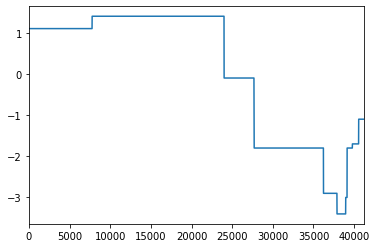

In [53]:
bank_data["emp.var.rate"].plot()